## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Image Preprocessing

### Training Image

In [2]:
training_set =tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70304 files belonging to 38 classes.


### Validation Image

In [3]:
validation_set =tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17573 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[163.5  143.5  152.5 ]
   [157.75 137.75 146.75]
   [139.25 119.25 128.25]
   ...
   [147.   127.   129.  ]
   [147.   127.   129.  ]
   [160.25 140.25 142.25]]

  [[154.25 134.25 143.25]
   [181.   161.   170.  ]
   [165.75 145.75 154.75]
   ...
   [159.5  139.5  141.5 ]
   [151.25 131.25 133.25]
   [153.5  133.5  135.5 ]]

  [[164.   144.   153.  ]
   [171.75 151.75 160.75]
   [153.75 133.75 142.75]
   ...
   [150.75 130.75 132.75]
   [164.   144.   146.  ]
   [160.25 140.25 142.25]]

  ...

  [[172.5  151.5  158.5 ]
   [163.5  142.5  149.5 ]
   [177.5  156.5  163.5 ]
   ...
   [166.   142.   142.  ]
   [169.25 145.25 145.25]
   [174.5  150.5  150.5 ]]

  [[168.25 147.25 154.25]
   [164.5  143.5  150.5 ]
   [191.   170.   177.  ]
   ...
   [171.75 147.75 147.75]
   [176.5  152.5  152.5 ]
   [184.25 160.25 160.25]]

  [[163.5  142.5  149.5 ]
   [168.75 147.75 154.75]
   [169.   148.   155.  ]
   ...
   [168.   144.   144.  ]
   [173.   149.   149.  ]
   [174.   150.   15

## Build Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

## Build Convolution Layer

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Dropout(0.25))

In [9]:
model.add(Flatten())

In [10]:
model.add(Dense(units=1500, activation='relu'))

In [11]:
model.add(Dropout(0.4))

In [12]:
#output layer
model.add(Dense(units=38, activation='softmax'))

## Compile Model

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Train model

In [15]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 524s 234ms/step - loss: 1.3374 - accuracy: 0.6062 - val_loss: 0.5204 - val_accuracy: 0.8342
Epoch 2/10
2197/2197 [==============================] - 538s 245ms/step - loss: 0.4377 - accuracy: 0.8609 - val_loss: 0.3777 - val_accuracy: 0.8872
Epoch 3/10
2197/2197 [==============================] - 538s 245ms/step - loss: 0.2603 - accuracy: 0.9150 - val_loss: 0.1835 - val_accuracy: 0.9413
Epoch 4/10
2197/2197 [==============================] - 540s 246ms/step - loss: 0.1810 - accuracy: 0.9409 - val_loss: 0.1850 - val_accuracy: 0.9421
Epoch 5/10
2197/2197 [==============================] - 546s 249ms/step - loss: 0.1333 - accuracy: 0.9565 - val_loss: 0.1608 - val_accuracy: 0.9471
Epoch 6/10
2197/2197 [==============================] - 559s 254ms/step - loss: 0.1065 - accuracy: 0.9647 - val_loss: 0.1585 - val_accuracy: 0.9520
Epoch 7/10
2197/2197 [==============================] - 544s 248ms/step - loss: 0.0830 - accuracy: 0.9723 - val_

## Evaluate Model

### On Training Set

In [16]:
train_loss,train_accuracy=model.evaluate(training_set)

2197/2197 [==============================] - 118s 54ms/step - loss: 0.0361 - accuracy: 0.9885


In [17]:
print(train_loss,train_accuracy)

0.03607684373855591 0.98846435546875


### On Validation Set

In [18]:
val_loss,val_accuracy=model.evaluate(validation_set)

550/550 [==============================] - 31s 56ms/step - loss: 0.1345 - accuracy: 0.9653


In [19]:
print(val_loss,val_accuracy)

0.13447363674640656 0.9652876853942871


## Save The Model

In [21]:
model.save("trained_model.keras")

In [22]:
training_history.history

{'loss': [1.3374162912368774,
  0.4377484619617462,
  0.26029255986213684,
  0.18103322386741638,
  0.13331124186515808,
  0.1065056249499321,
  0.08296048641204834,
  0.07366278022527695,
  0.05932197719812393,
  0.055734507739543915],
 'accuracy': [0.6061959266662598,
  0.8608898520469666,
  0.914969265460968,
  0.9409421682357788,
  0.9564889669418335,
  0.964724600315094,
  0.9722917675971985,
  0.9760611057281494,
  0.9804705381393433,
  0.9817933440208435],
 'val_loss': [0.5204164385795593,
  0.3776797950267792,
  0.18353095650672913,
  0.1849905550479889,
  0.16077837347984314,
  0.15846394002437592,
  0.1457260400056839,
  0.11137736588716507,
  0.11384633928537369,
  0.13447366654872894],
 'val_accuracy': [0.8341774344444275,
  0.8871564269065857,
  0.94127357006073,
  0.9421271085739136,
  0.947134792804718,
  0.9519717693328857,
  0.957889974117279,
  0.9658567309379578,
  0.9674500823020935,
  0.9652876853942871]}

## Record History

In [23]:
import json
with open("training_history.json","w") as f:
    json.dump(training_history.history,f)

## Visualize Accuracy

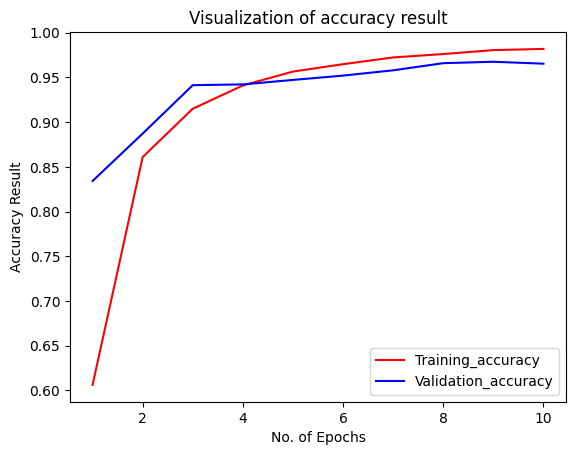

In [24]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training_accuracy')
plt.plot(epochs,training_history.history[ 'val_accuracy'],color='blue',label='Validation_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of accuracy result")
plt.legend()
plt.show()

### Other metrics for model evaluation

In [25]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17573 files belonging to 38 classes.


In [27]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 29s 51ms/step


(array([[9.9996150e-01, 3.5357232e-06, 5.9420841e-12, ..., 3.0689081e-16,
         1.5534807e-15, 8.0030194e-14],
        [1.0000000e+00, 9.7333785e-10, 1.1514007e-16, ..., 7.1775013e-22,
         7.7301194e-22, 1.6039520e-20],
        [1.0000000e+00, 3.2876101e-11, 1.5730108e-15, ..., 1.7844758e-22,
         1.0014481e-20, 1.5921586e-17],
        ...,
        [1.2711275e-11, 4.2290574e-13, 1.2972852e-09, ..., 1.1963204e-11,
         2.8737329e-12, 9.9999964e-01],
        [2.1201763e-11, 2.3628668e-13, 8.5142177e-10, ..., 1.8973699e-11,
         2.8887157e-11, 9.9999988e-01],
        [2.5564744e-15, 1.2091637e-17, 2.2028931e-16, ..., 9.9303053e-19,
         4.1302716e-14, 1.0000000e+00]], dtype=float32),
 (17573, 38))

In [28]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17573,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [29]:
true_categories = tf.concat([y for x,y in test_set],axis=0) 
true_categories

<tf.Tensor: shape=(17573,), dtype=int32, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
 print(classification_report(true_categories,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.91      0.94       504
                                 Apple___Black_rot       0.92      1.00      0.95       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.90      0.98      0.94       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.95      0.95       411
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.96      0.

In [32]:
cm = confusion_matrix(true_categories,predicted_categories)
cm.shape

(38, 38)

## Visualize Confusion Matrix

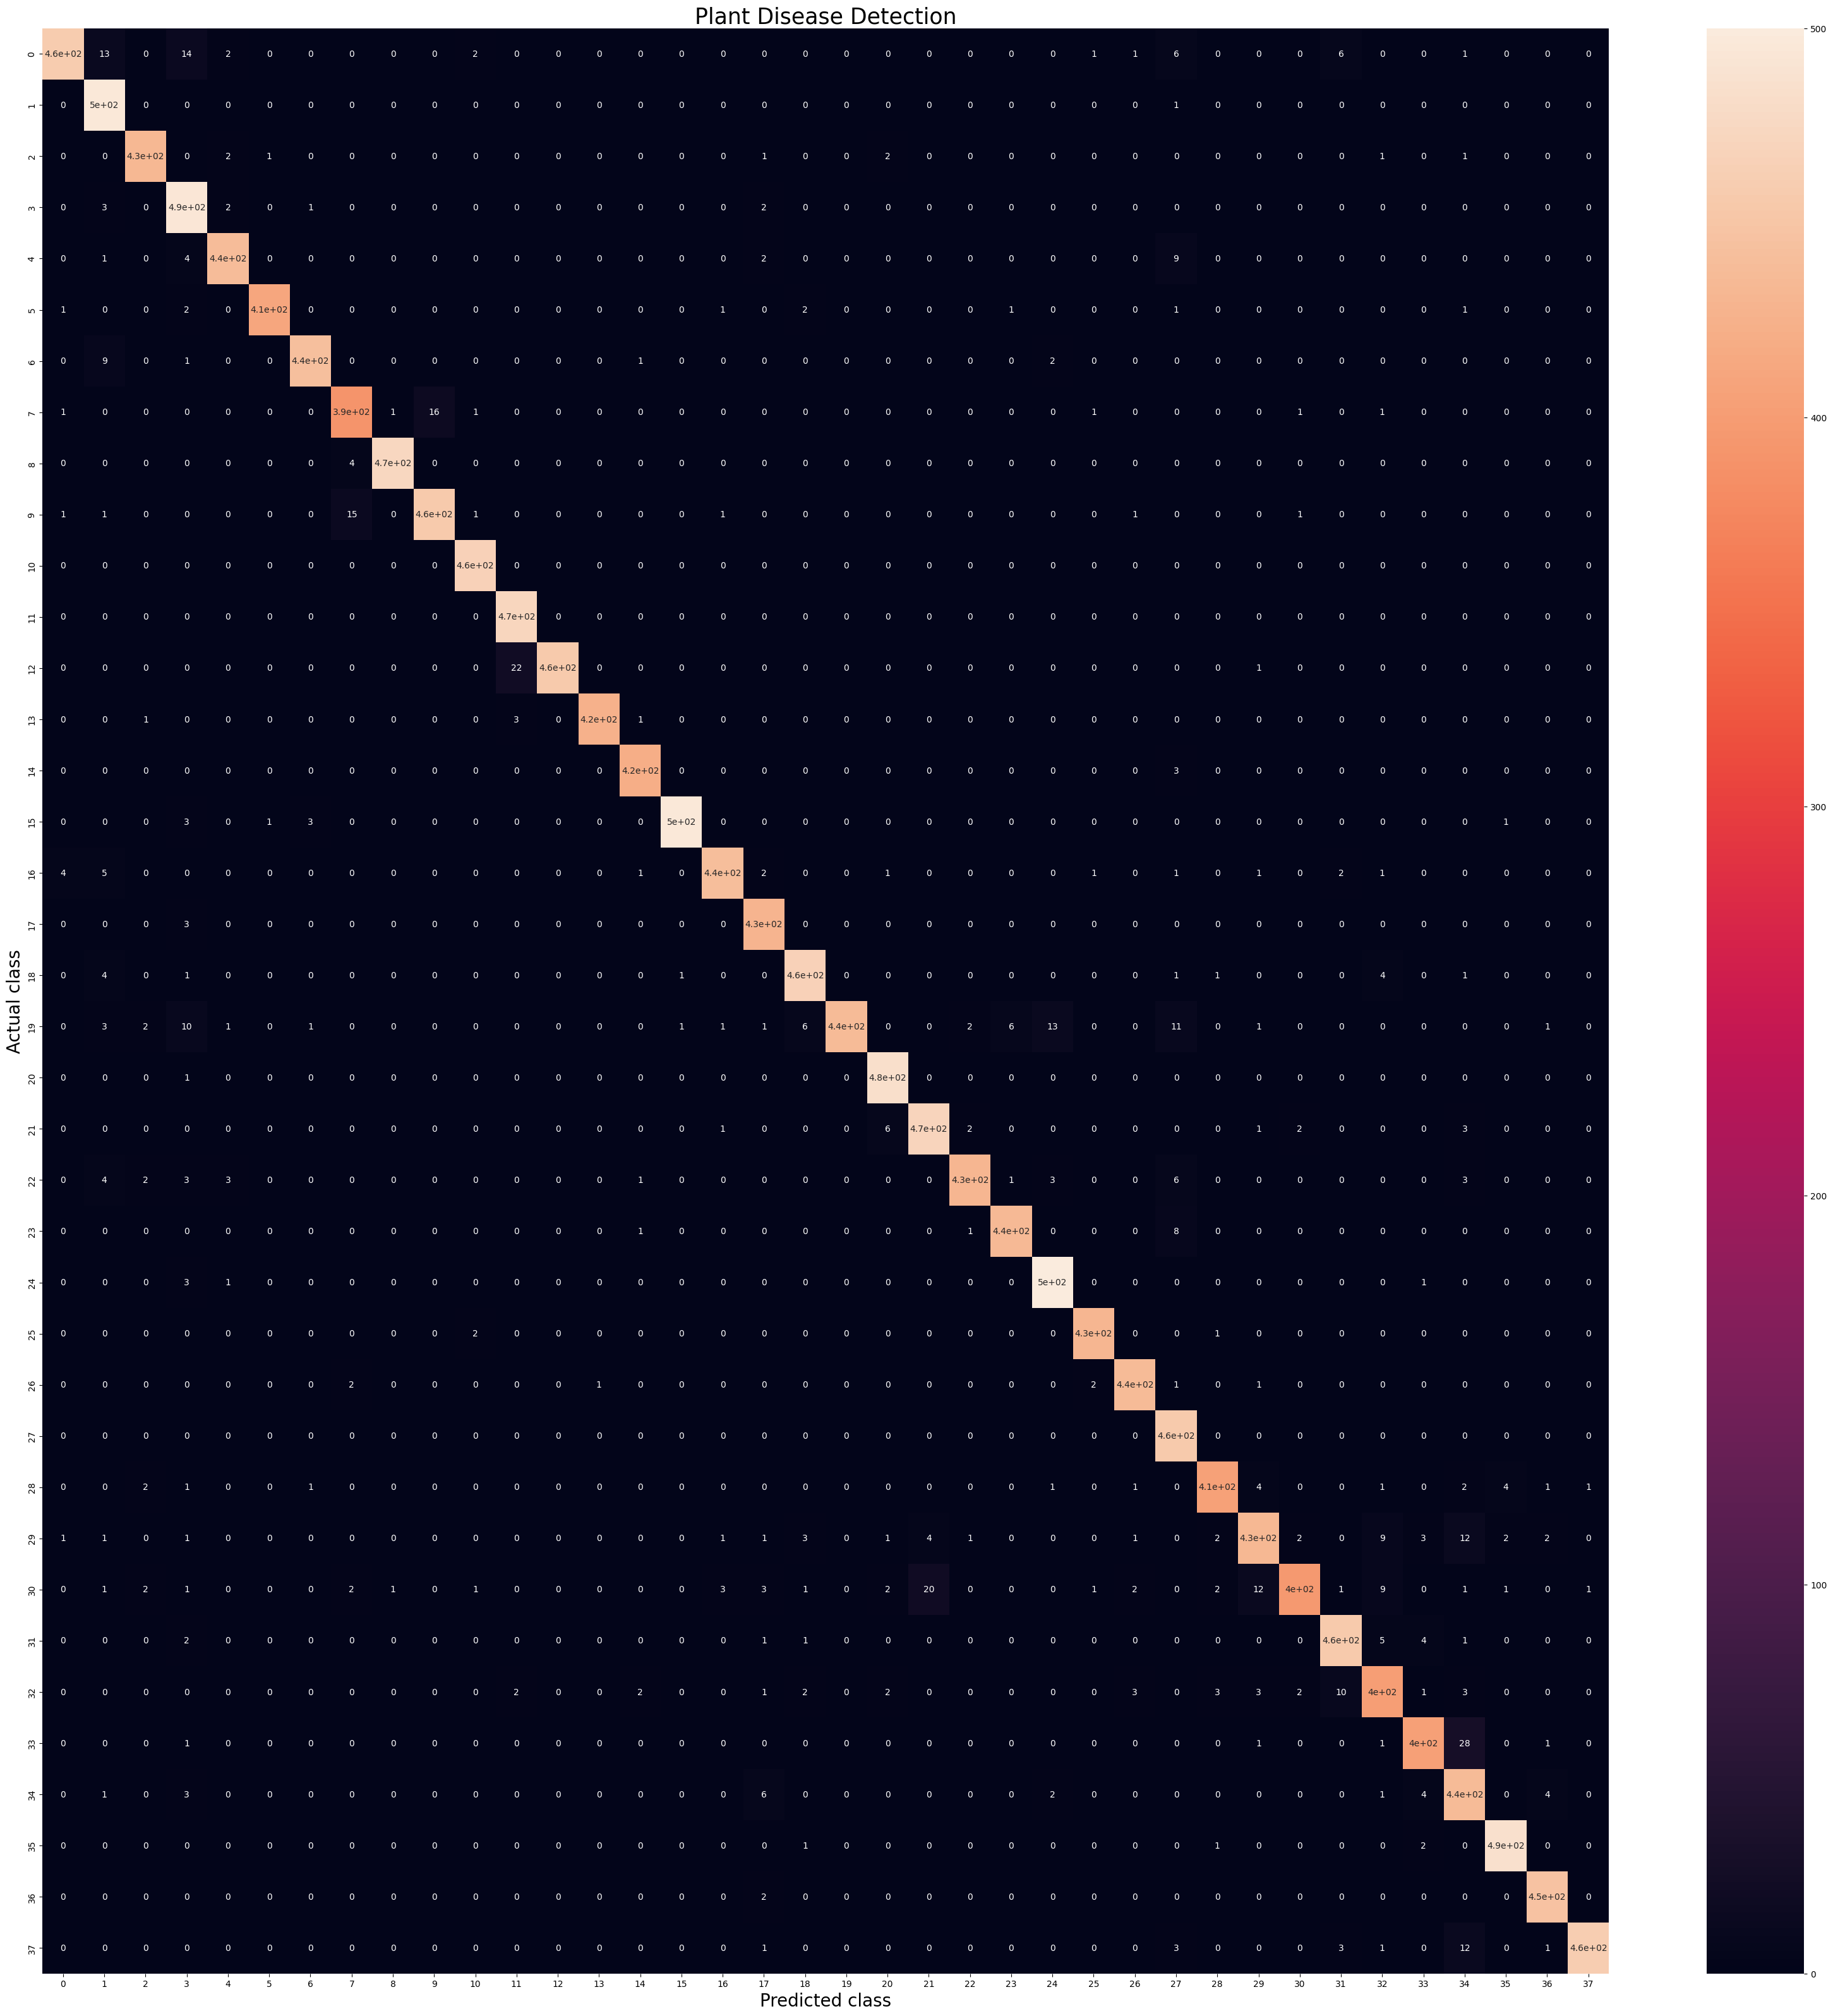

In [33]:
plt.figure(figsize=[40,40])
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Plant Disease Detection",fontsize=25)
plt.show()